In [1]:
from eyring_model import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 300
multi = True
dH_barrier = 3.5
dS_barrier = -9/T
dH_sigma = dH_barrier/3
dS_sigma = -dS_barrier/3
n_paths = 2000 # infinite limit, approximately corresponds to unit area = 0.1 um^2

barrier_dist = 'equal'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier])}


#### Equal number of jumps, equal jump lengths, equal barriers

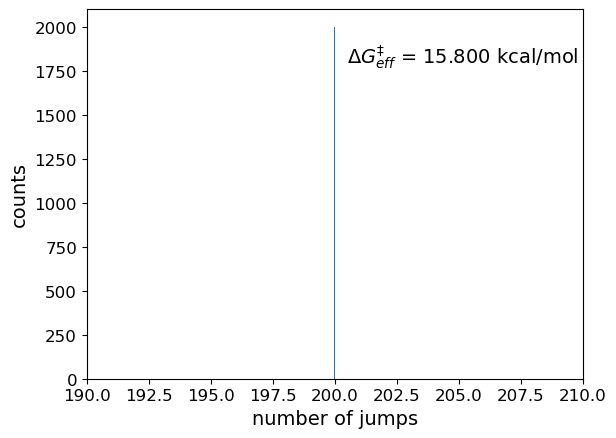

In [3]:
n_jump_params = {'mu' : 200}
rng = np.random.default_rng()
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(n_jump_params['mu']+0.5, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(190, 210)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

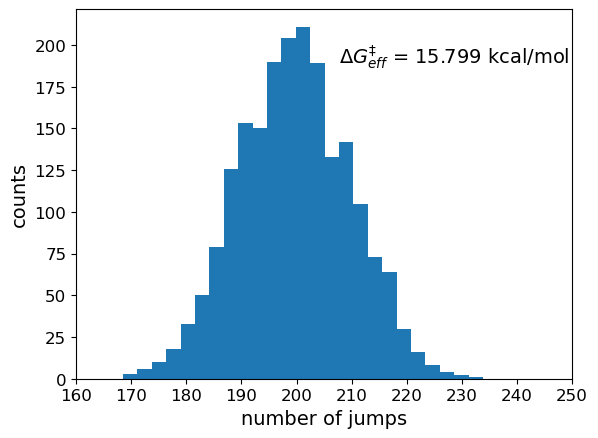

In [4]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(160, 250)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 2000 jumps, std = 100**

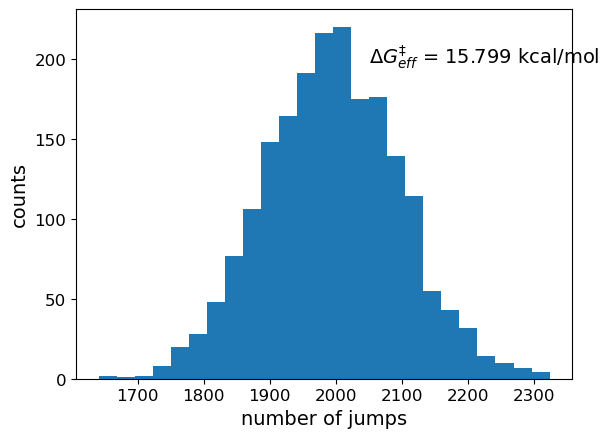

In [5]:
n_jump_params = {'mu' : 2000,
                'sigma' : 100}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

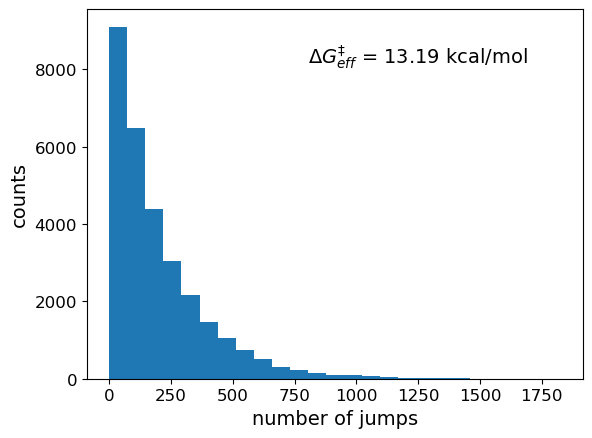

In [6]:
n_paths = 30_000

n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.2f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 2000**

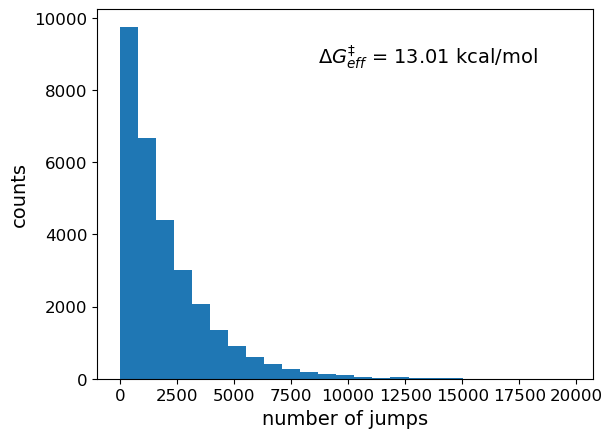

In [7]:
n_paths = 30_000

n_jump_params = {'beta' : 2000}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.2f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Equal jump lengths, equal number of jumps, equal barriers

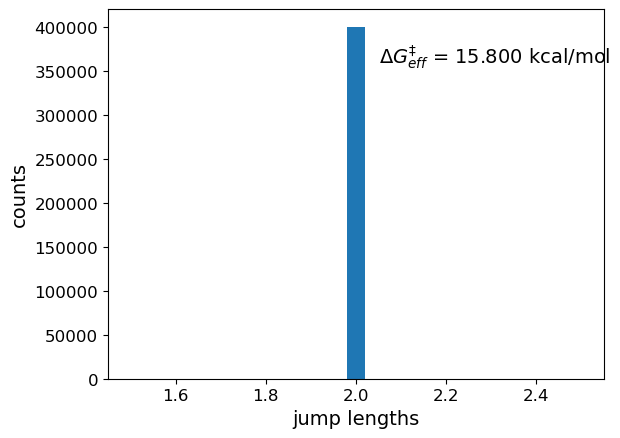

In [8]:
n_paths = 2000

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(jump_lengths.mean()+0.05, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

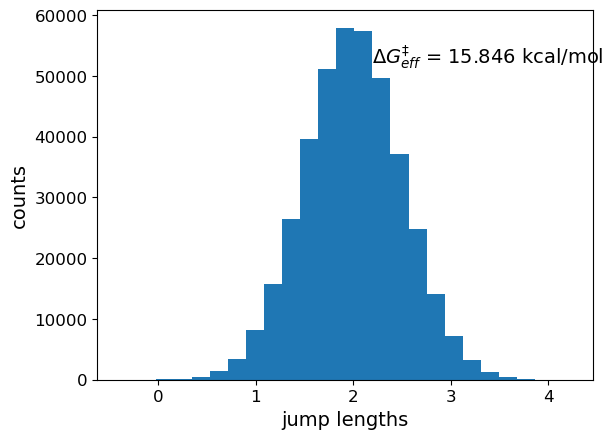

In [9]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 20**

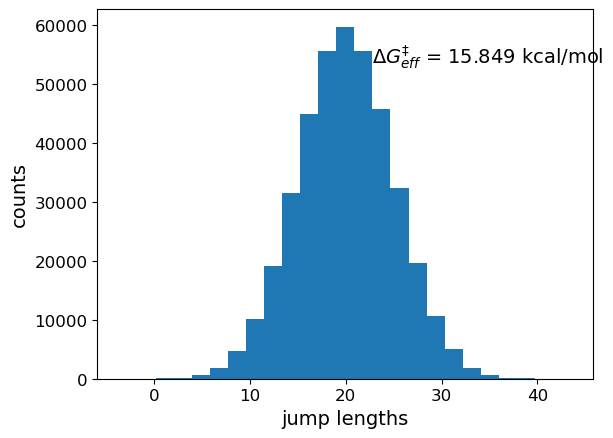

In [15]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 20, 'sigma' : 5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

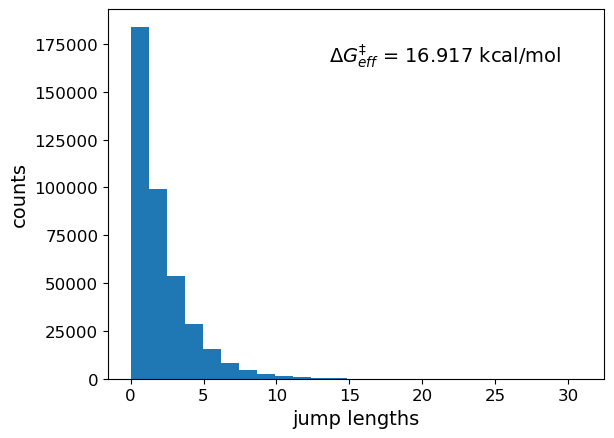

In [10]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 20**

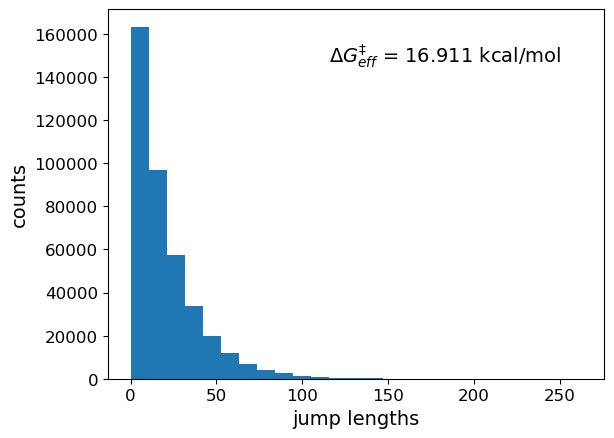

In [17]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 20}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, normally distributed jump lengths, equal barriers

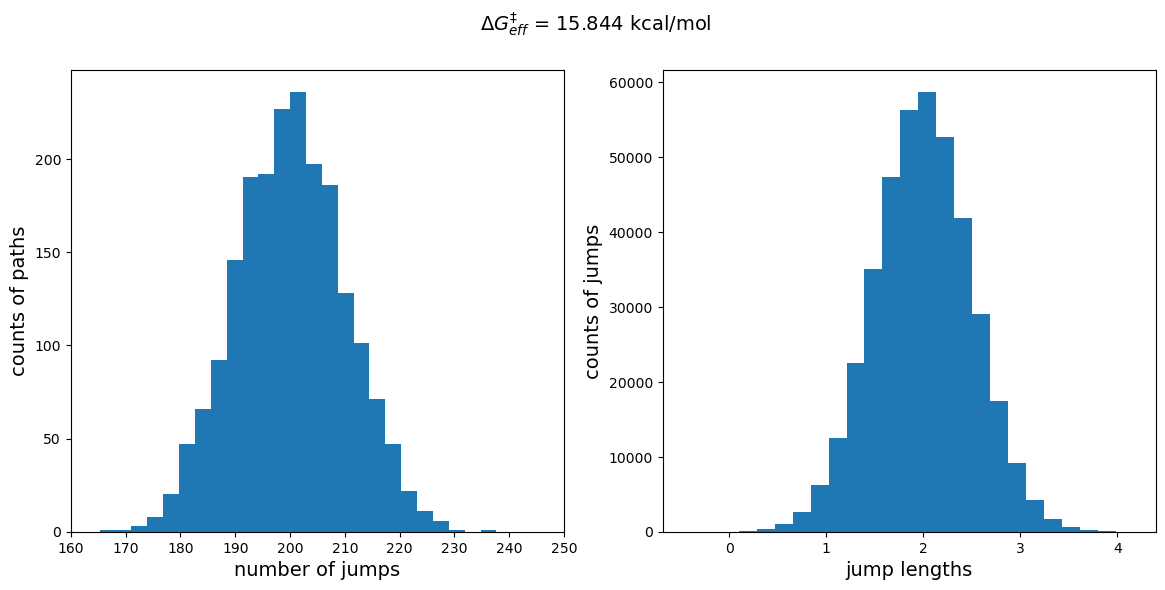

In [11]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Normally distributed number of jumps, exponentially distributed jump lengths, equal barriers

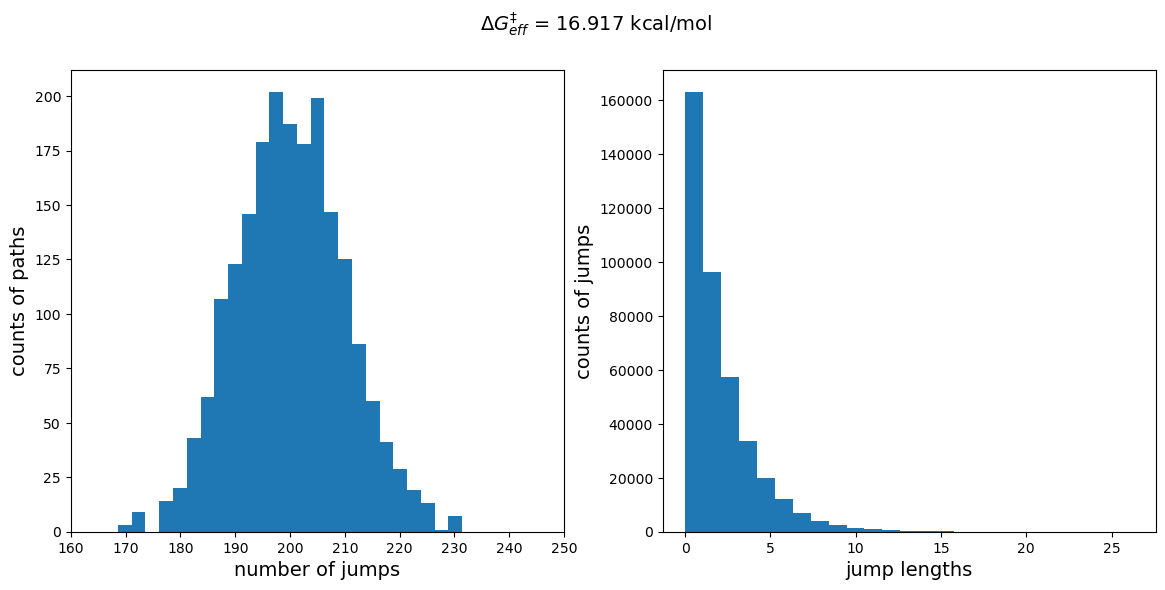

In [12]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, normally distributed jump lengths, equal barriers

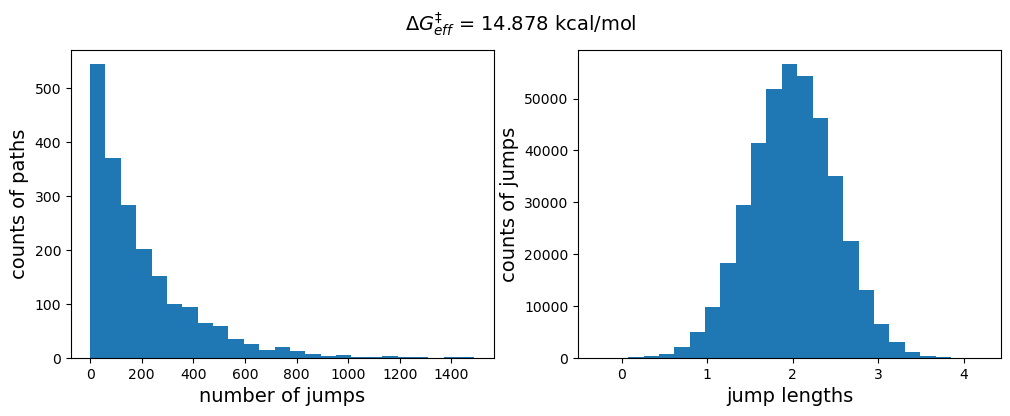

In [13]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, exponentially distributed jump lengths, equal barriers

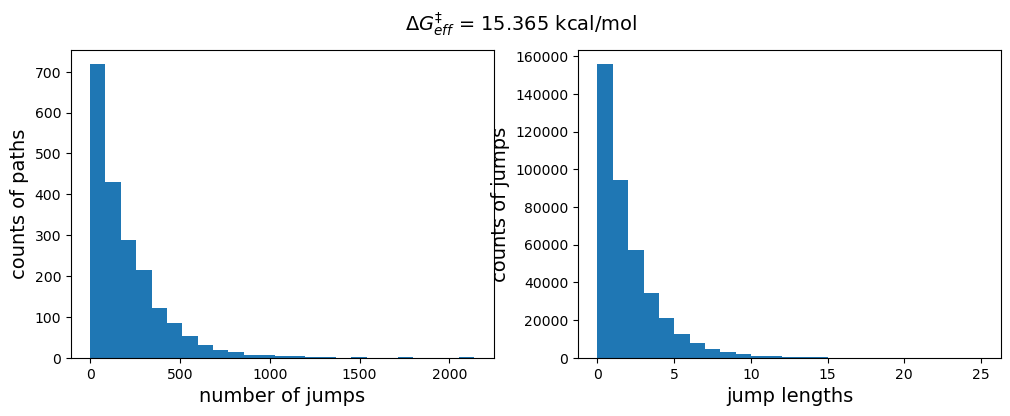

In [14]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);